In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy/notebooks/ashish_validation_train


In [2]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.path.append("../../")
from src.utils import *

sys.version

'3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:55:37) \n[Clang 14.0.6 ]'

In [3]:
%load_ext autoreload 
%autoreload 2

In [4]:
y_pred_null = pd.read_csv("../../results/null_model_results_final.csv",index_col=0)
y_pred_null["SALES_DATE"] = pd.to_datetime(y_pred_null["SALES_DATE"])
y_pred_null.head()

,Encoded_SKU_ID,SALES_DATE,predicted
0,23,2022-08-06,1
1,100,2022-08-02,2
2,121,2022-08-06,0
3,207,2022-08-03,1
4,416,2022-08-05,11


In [5]:
original_validation = pd.read_excel("../../data/Validation_Data.xlsx").drop_duplicates()

In [6]:
y_act = original_validation[["Encoded_SKU_ID","SALES_DATE","DAILY_UNITS"]].rename(columns = {"DAILY_UNITS":"actual"})
y_act.head()

,Encoded_SKU_ID,SALES_DATE,actual
0,23,2022-08-06,3
1,100,2022-08-02,2
2,121,2022-08-06,6
3,207,2022-08-03,0
4,416,2022-08-05,9


In [8]:
y_act.dtypes

Encoded_SKU_ID             int64
SALES_DATE        datetime64[ns]
actual                     int64
dtype: object

In [9]:
y_pred_null.dtypes

Encoded_SKU_ID             int64
SALES_DATE        datetime64[ns]
predicted                  int64
dtype: object

In [10]:
rmse(y_act,y_pred_null)

5.290976671399268

In [8]:
rmse_sku_null = rmse_sku(y_act,y_pred_null)

In [9]:
rmse_sku_null.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
469,91.411940,396.000000,0.230838
430,40.362642,94.714286,0.426152
50,32.671525,73.857143,0.442361
557,22.696759,33.285714,0.681877
271,16.694738,28.428571,0.587252


In [10]:
rmse_sku_null.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
533,0.377964,0.142857,2.645751
370,0.377964,0.142857,2.645751
419,0.377964,0.142857,2.645751
9,0.377964,0.142857,2.645751
337,0.377964,1.142857,0.330719


In [7]:
original_train = pd.read_csv("../../data/train_validation_marker.csv").drop_duplicates()
original_train["SALES_DATE"] = pd.to_datetime(original_train["SALES_DATE"])

common_cols = set(original_train.columns).intersection(original_validation.columns)
original_train1 = pd.concat([original_train[list(common_cols)],original_validation[list(common_cols)]])

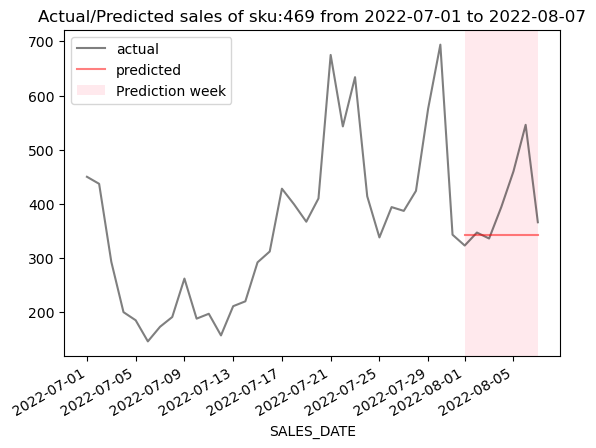

In [11]:
plot_pred_sku(original_train1,y_act, y_pred_null, 469, "2022-07-01")

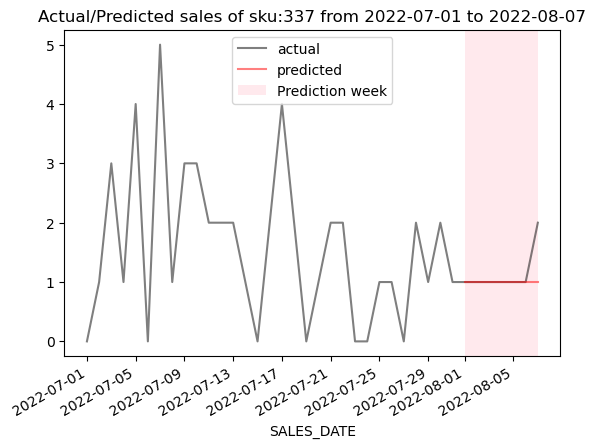

In [12]:
plot_pred_sku(original_train1,y_act, y_pred_null, 337)

### Holt RMSE specific

In [20]:
y_pred_holt = pd.read_csv("../../results/holt_rst_final_02.csv",index_col=0)
y_pred_holt["SALES_DATE"] = pd.to_datetime(y_pred_holt["SALES_DATE"])
y_pred_holt.head()

,SALES_DATE,predicted,Encoded_SKU_ID
0,2022-08-01,1.598060,365
1,2022-08-02,1.334868,365
2,2022-08-03,1.755911,365
3,2022-08-04,1.440121,365
4,2022-08-05,1.492759,365


In [21]:
rmse_sku_holt = rmse_sku(y_act,y_pred_holt)

In [22]:
rmse_sku_holt.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
157,46.277526,0.571429,80.985671
358,20.790315,0.285714,72.766103
548,7.120719,2.285714,3.115315
147,5.025741,0.571429,8.795047
76,4.843518,0.285714,16.952313


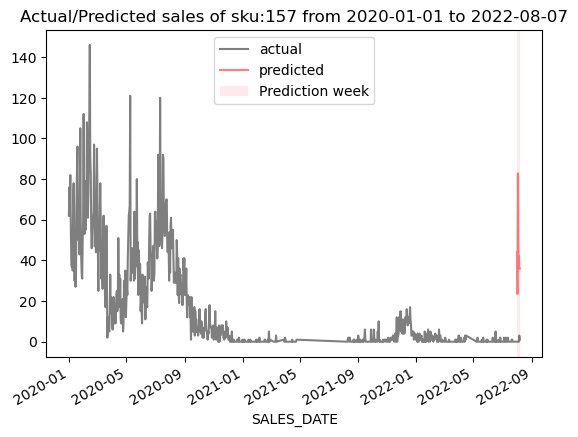

In [24]:
plot_pred_sku(original_train1,y_act, y_pred_holt, 157, "2020-01-01")

In [40]:
rmse_sku_holt.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
171,0.811962,1.000000,0.811962
248,0.799294,0.285714,2.797527
485,0.794750,0.714286,1.112649
404,0.716962,1.714286,0.418228
337,0.521113,1.142857,0.455974


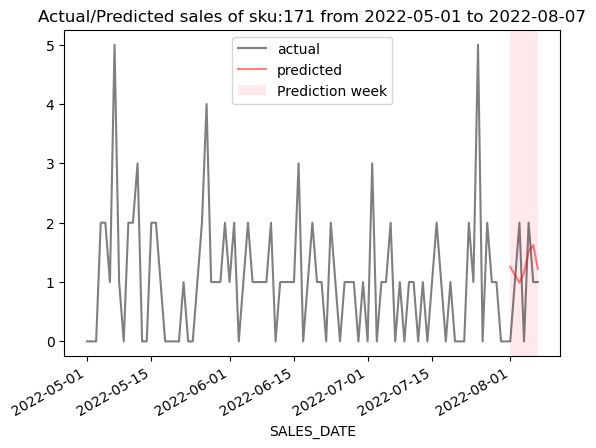

In [25]:
plot_pred_sku(original_train1,y_act, y_pred_holt, 171, "2022-05-01")

### Prophet STL MSTL

In [26]:
#y_prophet_stl
import pickle
with open('../../data/stl_prophet_final_results_127sku2.pkl', 'rb') as f:
    all_preds = pickle.load(f)
    
y_pred_prophet_stl_mstl = pd.DataFrame()
for i in range(len(all_preds)):
    if all_preds[i]!= None:
        y_pred_prophet_stl_mstl = pd.concat([y_pred_prophet_stl_mstl,all_preds[i][1]])
y_pred_prophet_stl_mstl = y_pred_prophet_stl_mstl.reset_index().drop(columns=["actual"])
y_pred_prophet_stl_mstl["SALES_DATE"] = pd.to_datetime(y_pred_prophet_stl_mstl["SALES_DATE"])
y_pred_prophet_stl_mstl.Encoded_SKU_ID.nunique()

Importing plotly failed. Interactive plots will not work.


219

In [27]:
y_pred_stl = y_pred_prophet_stl_mstl[["SALES_DATE","STL_prediction","Encoded_SKU_ID"\
                        ]].rename(columns={"STL_prediction":"predicted"})

y_pred_mstl = y_pred_prophet_stl_mstl[["SALES_DATE","MSTL_prediction","Encoded_SKU_ID"\
                        ]].rename(columns={"MSTL_prediction":"predicted"})

y_pred_prophet = y_pred_prophet_stl_mstl[["SALES_DATE","prophet_prediction","Encoded_SKU_ID"\
                        ]].rename(columns={"prophet_prediction":"predicted"})

In [28]:
rmse_sku_prophet = rmse_sku(y_act,y_pred_prophet)
rmse_sku_prophet.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
469,108.701149,396.000000,0.274498
99,24.845392,10.857143,2.288391
74,18.609937,41.142857,0.452325
157,16.666820,0.571429,29.166935
463,14.405091,1.857143,7.756588


In [29]:
rmse_sku_prophet.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
114,0.467357,0.571429,0.817875
62,0.466056,0.428571,1.087464
518,0.455706,1.000000,0.455706
422,0.451253,0.285714,1.579385
529,0.429585,0.428571,1.002366


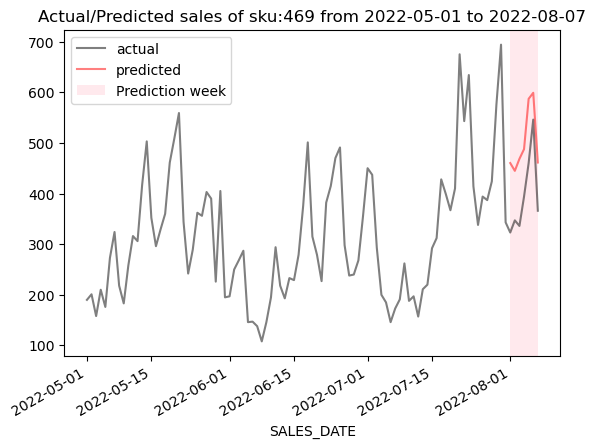

In [31]:
plot_pred_sku(original_train1,y_act, y_pred_prophet, 469, "2022-05-01")

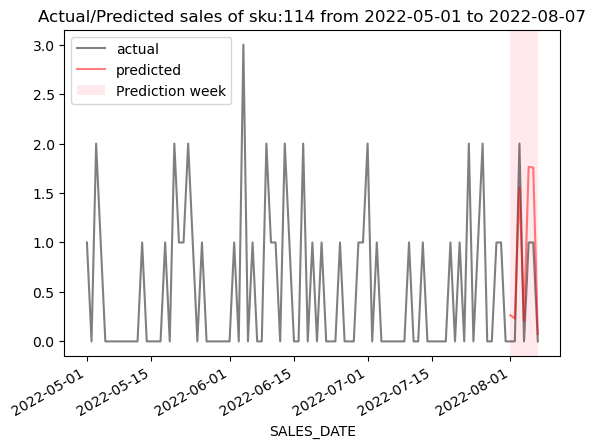

In [32]:
plot_pred_sku(original_train1,y_act, y_pred_prophet, 114, "2022-05-01")

### STL

In [33]:
rmse_sku_stl = rmse_sku(y_act,y_pred_stl)
rmse_sku_stl.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
469,33.161158,396.000000,0.083740
144,16.674800,29.285714,0.569383
50,13.276286,73.857143,0.179756
74,11.542616,41.142857,0.280550
157,10.774519,0.571429,18.855408


In [35]:
rmse_sku_stl.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
337,0.426782,1.142857,0.373434
275,0.426429,1.285714,0.331667
477,0.393320,0.857143,0.458873
55,0.374063,1.571429,0.238040
258,0.317154,0.285714,1.110037


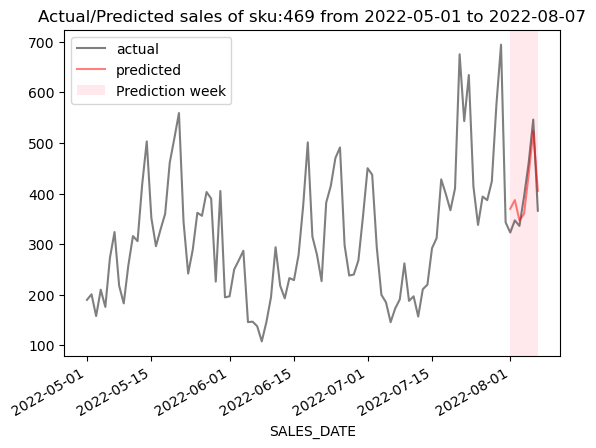

In [37]:
plot_pred_sku(original_train1,y_act, y_pred_stl, 469, "2022-05-01")

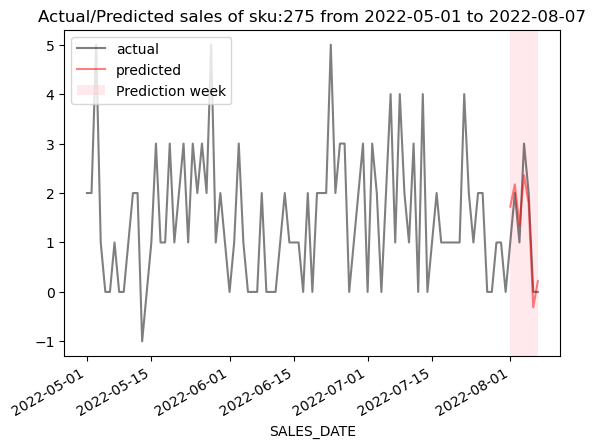

In [44]:
plot_pred_sku(original_train1,y_act, y_pred_stl, 275, "2022-05-01")

### HMM

In [40]:
#y_hmm
y_pred_hmm = pd.read_csv("../../results/hmm_result_final_all2.csv").drop(columns=["Unnamed: 0"])
y_pred_hmm["SALES_DATE"] = pd.to_datetime(y_pred_hmm["SALES_DATE"])
y_pred_hmm.Encoded_SKU_ID.nunique()

300

In [62]:
y_pred_hmm1 = y_pred_hmm[["SALES_DATE","predicted","Encoded_SKU_ID"]].dropna()

In [63]:
rmse_sku_hmm = rmse_sku(y_act,y_pred_hmm1)
rmse_sku_hmm.head()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
482,5.644213,6.285714,0.897943
315,4.813708,5.000000,0.962742
183,4.519798,5.714286,0.790965
319,4.292851,3.142857,1.365907
312,4.017817,5.285714,0.760128


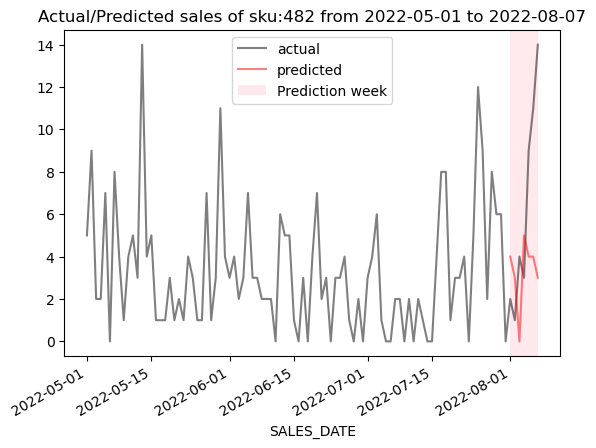

In [64]:
plot_pred_sku(original_train1,y_act, y_pred_hmm, 482, "2022-05-01")

In [78]:
rmse_sku_hmm[rmse_sku_hmm.mean_du>3].sort_values(by="rmse_du")

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
273,1.213613,4.142857,0.292941
34,1.634669,3.571429,0.457707
559,1.927248,3.142857,0.613215
54,2.138090,3.142857,0.680301
232,2.154936,3.857143,0.558687
169,2.323944,4.714286,0.492958
538,2.387542,4.000000,0.596886
545,2.444016,3.571429,0.684324
424,2.452550,3.428571,0.715327


In [83]:
rmse_sku_hmm.tail()

,rmse_du,mean_du,pct_rmse
Encoded_SKU_ID,,,
471,0.377964,0.285714,1.322876
407,0.377964,0.142857,2.645751
542,0.377964,0.000000,inf
215,0.316228,0.100000,3.162278
228,0.000000,0.111111,0.000000


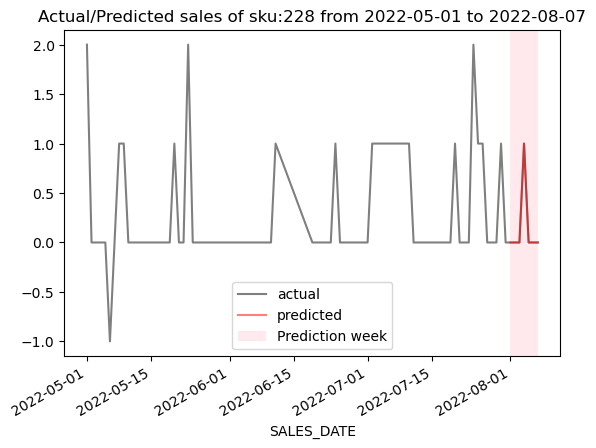

In [84]:
plot_pred_sku(original_train1,y_act, y_pred_hmm, 228, "2022-05-01")